In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


import utils
from feature_engineering import feature_engineering

In [2]:
olist = utils.load_olist_main_processed()
olist = feature_engineering(olist)
olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,delivery_delta,processing_time,shipping_time,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,8.0,13.0,9350.0,maua,SP,housewares,-8.0,2.0,6.0,1976.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,8.0,13.0,9350.0,maua,SP,housewares,-8.0,2.0,6.0,1976.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,8.0,13.0,9350.0,maua,SP,housewares,-8.0,2.0,6.0,1976.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,...,13.0,19.0,31570.0,belo horizonte,SP,perfumery,-6.0,0.0,12.0,4693.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,19.0,21.0,14840.0,guariba,SP,auto,-18.0,0.0,9.0,9576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4.0,...,10.0,40.0,17602.0,tupa,SP,baby,-2.0,1.0,20.0,16000.0
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5.0,...,90.0,22.0,8290.0,sao paulo,SP,home_appliances_2,-6.0,1.0,23.0,63360.0
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,20.0,20.0,37175.0,ilicinea,MG,computers_accessories,-21.0,3.0,13.0,8000.0
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,20.0,20.0,37175.0,ilicinea,MG,computers_accessories,-21.0,3.0,13.0,8000.0


In [3]:
# Data Cleaning

olist.dropna(subset=['review_score', 'order_id', 'product_id', 'seller_id'], inplace=True)
olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,delivery_delta,processing_time,shipping_time,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,8.0,13.0,9350.0,maua,SP,housewares,-8.0,2.0,6.0,1976.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,8.0,13.0,9350.0,maua,SP,housewares,-8.0,2.0,6.0,1976.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,8.0,13.0,9350.0,maua,SP,housewares,-8.0,2.0,6.0,1976.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,...,13.0,19.0,31570.0,belo horizonte,SP,perfumery,-6.0,0.0,12.0,4693.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,19.0,21.0,14840.0,guariba,SP,auto,-18.0,0.0,9.0,9576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4.0,...,10.0,40.0,17602.0,tupa,SP,baby,-2.0,1.0,20.0,16000.0
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5.0,...,90.0,22.0,8290.0,sao paulo,SP,home_appliances_2,-6.0,1.0,23.0,63360.0
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,20.0,20.0,37175.0,ilicinea,MG,computers_accessories,-21.0,3.0,13.0,8000.0
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,20.0,20.0,37175.0,ilicinea,MG,computers_accessories,-21.0,3.0,13.0,8000.0


In [4]:
# Selecting features for the model

features = [
    'price', 'freight_value', 'payment_installments', 'payment_value',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'delivery_delta', 'processing_time', 'shipping_time',
    'product_volume_cm3', 'payment_type', 'customer_state', 'product_category_name_english'
]
target = 'review_score'

X = olist[features]
y = olist[target]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(93865, 15) (93865,)
(23467, 15) (23467,)


In [5]:
# Preprocessing Pipeline
numerical_features = X.select_dtypes(include=np.number).columns.to_list()
categorical_features = X.select_dtypes(exclude = np.number).columns.to_list()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())                  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                    
])

preprocessor = ColumnTransformer(
    transformers= [('num', numerical_transformer, numerical_features),
                    ('cat', categorical_transformer, categorical_features)],
                    remainder='passthrough'
)

print("Feature engineering and preprocessing pipeline created successfully.")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Feature engineering and preprocessing pipeline created successfully.
Numerical features: ['price', 'freight_value', 'payment_installments', 'payment_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'delivery_delta', 'processing_time', 'shipping_time', 'product_volume_cm3']
Categorical features: ['payment_type', 'customer_state', 'product_category_name_english']


In [ ]:
# Baseline Model: Logsitic Regression

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter = 1000, multi_class = 'auto'))
])

print('Training Logistic Regression baseline model...')
lr_pipeline.fit(X_train, y_train)
print('Baseline model trained.')

# Random Forest Model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

print('\nTraining Random Forest model...')
rf_pipeline.fit(X_train, y_train)
print('Model trained.')


# XGBoost model
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective = 'multi:softmax',
        num_class = 5,
        eval_metric = 'mlogloss',
        #use_label_encoder = False
    ))
])

# Grid search for XGBoost
param_grid = {
    'classifier__n_estimators': [100,200,300,400,500],
    'classifier__max_depth': [5,10,15,20,25],
    'classifier__learning_rate': [0.1,0.05]
}

# Fixing class range for XGBoost
y_train_encoded = y_train - 1
y_test_encoded = y_test - 1
grid_search = GridSearchCV(xgb_pipeline, param_grid=param_grid, cv = 3, scoring='f1_macro', n_jobs = -1, verbose = 2)
print('\nStarting grid search for XGBoost.')
grid_search.fit(X_train, y_train_encoded)

print('\nGrid search complete.')
print('Best parameters found: ', grid_search.best_params_)
print('Best F1 Macro score: ', grid_search.best_score_)


Training Logistic Regression baseline model...


c:\Users\lucas\OneDrive\Área de Trabalho\Lucas\Projetos\E-commerce_reviews_classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Baseline model trained.

Training Random Forest model...
Model trained.

Starting grid search for XGBoost.
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Grid search complete.
Best parameters found:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 20, 'classifier__n_estimators': 400}
Best F1 Macro score:  0.44876931087331684

Evaluating best Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['price', 'freight_value',
                                                   'paym

c:\Users\lucas\OneDrive\Área de Trabalho\Lucas\Projetos\E-commerce_reviews_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucas\OneDrive\Área de Trabalho\Lucas\Projetos\E-commerce_reviews_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucas\OneDrive\Área de Trabalho\Lucas\Projetos\E-commerce_reviews_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and be

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.76      0.52      0.62      2972
         2.0       0.91      0.25      0.39       817
         3.0       0.85      0.20      0.32      1968
         4.0       0.72      0.19      0.30      4457
         5.0       0.65      0.97      0.78     13253

    accuracy                           0.67     23467
   macro avg       0.78      0.42      0.48     23467
weighted avg       0.71      0.67      0.62     23467

--- Confusion Matrix ---
[[ 1538     2    10    45  1377]
 [  109   203     1    17   487]
 [  114     3   395    34  1422]
 [   85     5    16   843  3508]
 [  165    11    44   224 12809]]

Evaluating best XGBoost model on test set:


NotFittedError: Pipeline is not fitted yet.

In [8]:
# Evaluating the best model
best_xgb_model = grid_search.best_estimator_

print(f'\nEvaluating Logistic Regression model on test set:')
y_pred = lr_pipeline.predict(X_test)

print('--- Classification Report ---')
print(classification_report(y_test, y_pred, zero_division=0))

print('--- Confusion Matrix ---')
print(confusion_matrix(y_test, y_pred))


print(f'\nEvaluating Random Forest model on test set:')
y_pred = rf_pipeline.predict(X_test)

print('--- Classification Report ---')
print(classification_report(y_test, y_pred, zero_division=0))

print('--- Confusion Matrix ---')
print(confusion_matrix(y_test, y_pred))


print('\nEvaluating best XGBoost model on test set:')
y_pred = best_xgb_model.predict(X_test)
print('--- Classification Report ---')
print(classification_report(y_test_encoded, y_pred, zero_division=0))

print('--- Confusion Matrix ---')
print(confusion_matrix(y_test_encoded, y_pred))




Evaluating Logistic Regression model on test set:
--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.56      0.23      0.33      2972
         2.0       0.00      0.00      0.00       817
         3.0       0.00      0.00      0.00      1968
         4.0       0.08      0.00      0.00      4457
         5.0       0.59      0.98      0.74     13253

    accuracy                           0.59     23467
   macro avg       0.25      0.24      0.21     23467
weighted avg       0.42      0.59      0.46     23467

--- Confusion Matrix ---
[[  694     0     0     2  2276]
 [  114     0     0     2   701]
 [  124     0     0     4  1840]
 [  118     0     0     1  4338]
 [  199     0     0     3 13051]]

Evaluating Random Forest model on test set:
--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.76      0.52      0.62      2972
         2.0       0.91      0.25      0.39       817
 

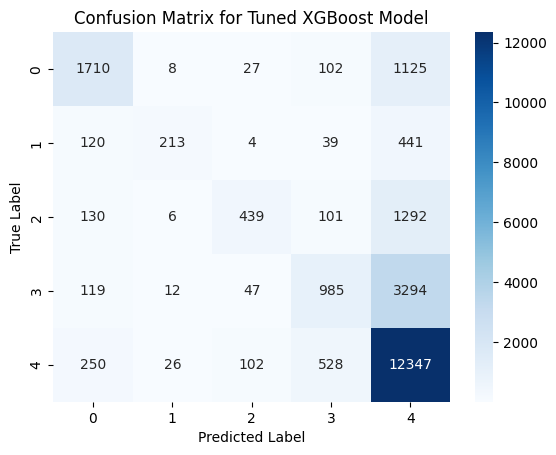

In [15]:
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned XGBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

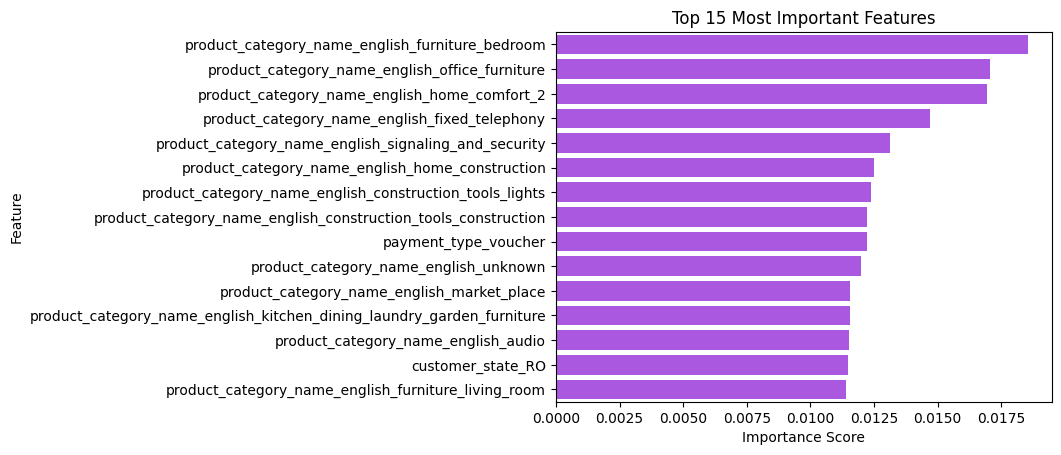

In [23]:
try:
    onehot_feature_names = best_xgb_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(onehot_feature_names)

    importances = best_xgb_model.named_steps['classifier'].feature_importances_

    feature_importances_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

    sns.barplot(x = 'importance', y='feature', data = feature_importances_df.head(15), color='#ad42f5')
    plt.title('Top 15 Most Important Features')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature');

except Exception as e:
    print(f'Could not generate feature importance plot. Error: {e}' )
    print('This can happen if the model does not have a \'feature_importances_\' attribute')